# LaptopPrice-Analysis

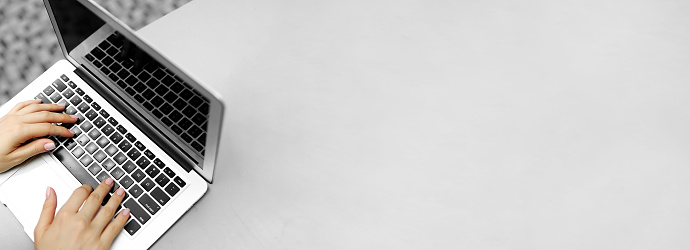

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\nirmi\Desktop\ALL\PROJECTS\Laptop Price Prediction\laptops.csv")

In [3]:
df.head()

,Manufacturer,ModelName,Category,ScreenSize,Screen,Resolution,xres,yres,CPU,RAM,Storage,GPU,Operating System,OperatingSystemVersion,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,1440x900,1440,900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,1920x1080,1920,1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,2880x1800,2880,1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,Mac OS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,NaN,1.37kg,16037611.20


In [4]:
df.shape

(1302, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            1302 non-null   object 
 1   ModelName               1302 non-null   object 
 2   Category                1302 non-null   object 
 3   ScreenSize              1302 non-null   object 
 4   Screen                  1302 non-null   object 
 5   Resolution              1302 non-null   object 
 6   xres                    1302 non-null   int64  
 7   yres                    1302 non-null   int64  
 8   CPU                     1302 non-null   object 
 9   RAM                     1302 non-null   object 
 10  Storage                 1302 non-null   object 
 11  GPU                     1302 non-null   object 
 12  Operating System        1302 non-null   object 
 13  OperatingSystemVersion  1132 non-null   object 
 14  Weight                  1302 non-null   

In [6]:
df.duplicated().sum()

28

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Manufacturer                0
ModelName                   0
Category                    0
ScreenSize                  0
Screen                      0
Resolution                  0
xres                        0
yres                        0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
OperatingSystemVersion    166
Weight                      0
Price                       0
dtype: int64

In [10]:
df.drop(columns=['OperatingSystemVersion'],inplace=True)

**Droped the OS Version column**

In [11]:
df.head()

,Manufacturer,ModelName,Category,ScreenSize,Screen,Resolution,xres,yres,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,1440x900,1440,900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,1920x1080,1920,1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,2880x1800,2880,1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37kg,16037611.20


In [12]:
df['ScreenSize'] = df['ScreenSize'].str.replace('"','')
df['RAM'] = df['RAM'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:
df['ScreenSize'] = df['ScreenSize'].astype('float32')
df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

**Converted the Screen Size, RAM, Weight to Float and integer format**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1274 non-null   object 
 1   ModelName         1274 non-null   object 
 2   Category          1274 non-null   object 
 3   ScreenSize        1274 non-null   float32
 4   Screen            1274 non-null   object 
 5   Resolution        1274 non-null   object 
 6   xres              1274 non-null   int64  
 7   yres              1274 non-null   int64  
 8   CPU               1274 non-null   object 
 9   RAM               1274 non-null   int32  
 10  Storage           1274 non-null   object 
 11  GPU               1274 non-null   object 
 12  Operating System  1274 non-null   object 
 13  Weight            1274 non-null   float32
 14  Price             1274 non-null   float64
dtypes: float32(2), float64(1), int32(1), int64(2), object(9)
memory usage: 144.3+ KB


In [15]:
df.describe()

,ScreenSize,xres,yres,RAM,Weight,Price
count,1274.00000,1274.000000,1274.000000,1274.000000,1274.000000,1.274000e+03
mean,15.02245,1772.059655,1073.051805,8.434851,2.040322,1.008751e+07
std,1.42994,467.626888,282.357996,5.095405,0.669419,6.231339e+06
min,10.10000,4.000000,768.000000,2.000000,0.690000,1.547208e+06
25%,14.00000,1366.000000,1080.000000,4.000000,1.500000,5.415228e+06
50%,15.60000,1920.000000,1080.000000,8.000000,2.040000,8.789742e+06
75%,15.60000,1920.000000,1080.000000,8.000000,2.310000,1.329354e+07
max,18.40000,3200.000000,2160.000000,64.000000,4.700000,5.423231e+07


In [16]:
df['Price'].max()

54232308.0

In [17]:
df['Price'].min()

1547208.0

In [18]:
df['Price'] = df['Price']/100

**Corrected the price datas**

In [19]:
df['Price'].max()

542323.08

In [20]:
df['Price'].min()

15472.08

# Number of Laptops according to Price

C:\Users\nirmi\AppData\Local\Temp\ipykernel_3644\1900740668.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],color="purple")


<Axes: xlabel='Price', ylabel='Density'>

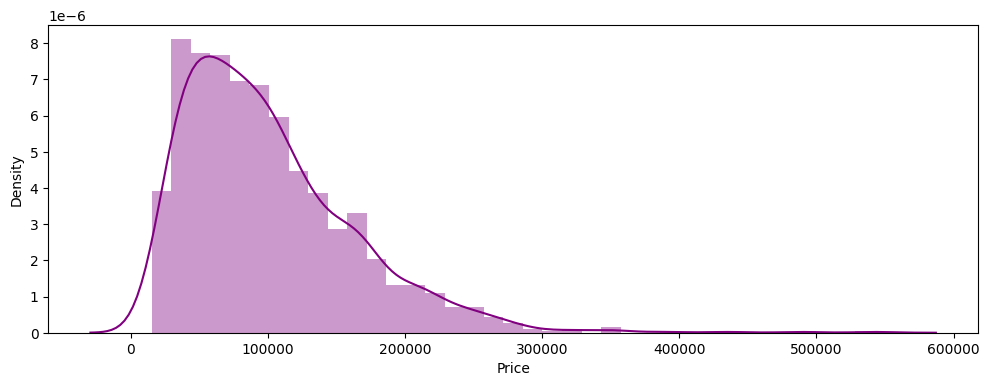

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(df['Price'],color="purple")

**Most of the LAptops are in the range less than 100000**

# Count of Laptops each Manufacturer

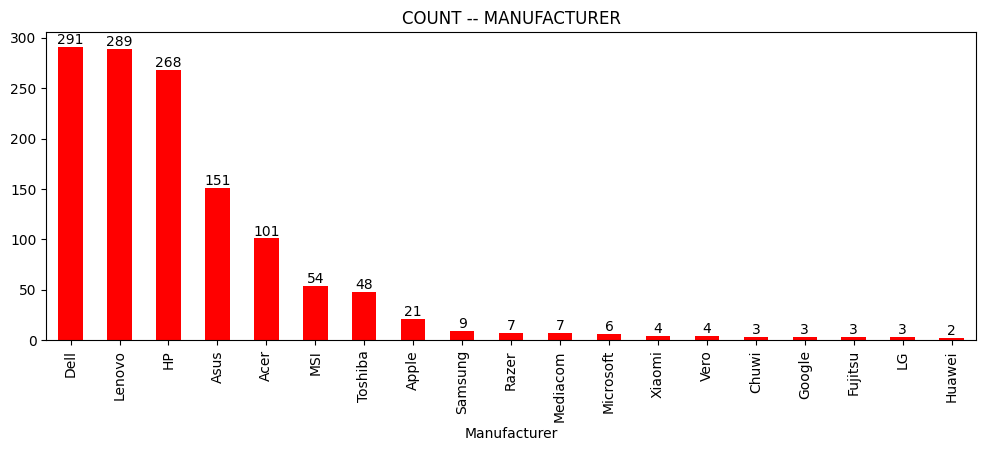

In [22]:
plt.figure(figsize=(12,4))
ax=df['Manufacturer'].value_counts().plot(kind='bar',color="red")
plt.title("COUNT -- MANUFACTURER")
for bars in ax.containers:ax.bar_label(bars)

**Maximum laptops are of Dell lenovo HP Asus Acer**

In [23]:
df.groupby(['Manufacturer'],as_index=False)['Price'].mean()

,Manufacturer,Price
0,Acer,56327.659378
1,Apple,139088.536971
2,Asus,99533.349870
3,Chuwi,27947.259600
4,Dell,106635.097695
5,Fujitsu,64822.680000
6,Google,149178.120000
7,HP,96061.579939
8,Huawei,126622.080000
9,LG,186643.080000


# Average price of laptops of each brand

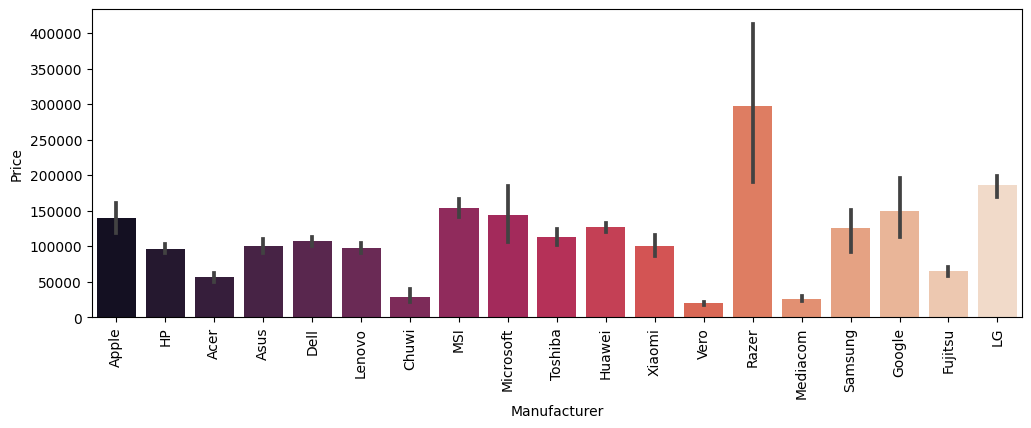

In [24]:
plt.figure(figsize=(12,4))
ax=sns.barplot(x=df['Manufacturer'],y=df['Price'],data=df.groupby(['Manufacturer'],as_index=False)['Price'].mean(),palette='rocket')
plt.xticks(rotation='vertical')
plt.show()

# Category of Laptops

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

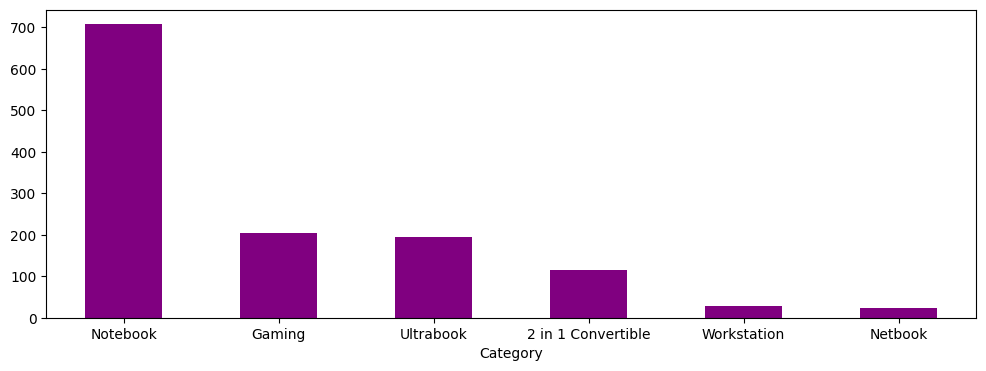

In [25]:
plt.figure(figsize=(12,4))
df['Category'].value_counts().plot(kind='bar',color="purple")
plt.xticks(rotation=0)

# Average price of Each category of Laptops

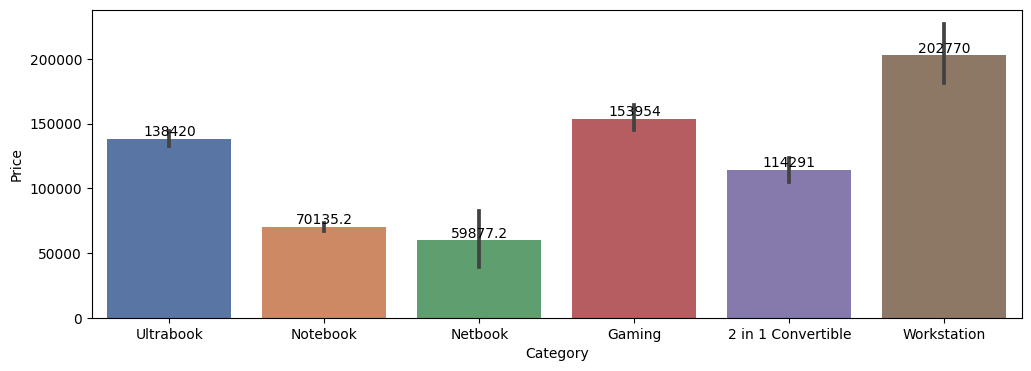

In [26]:
plt.figure(figsize=(12,4))
ax=sns.barplot(x=df['Category'],y=df['Price'],palette='deep')
for bars in ax.containers:ax.bar_label(bars)
plt.show()

**WorkStation are most costliest**

# Count of Laptops according to screen size

C:\Users\nirmi\AppData\Local\Temp\ipykernel_3644\1865070134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ScreenSize'],color="purple")


<Axes: xlabel='ScreenSize', ylabel='Density'>

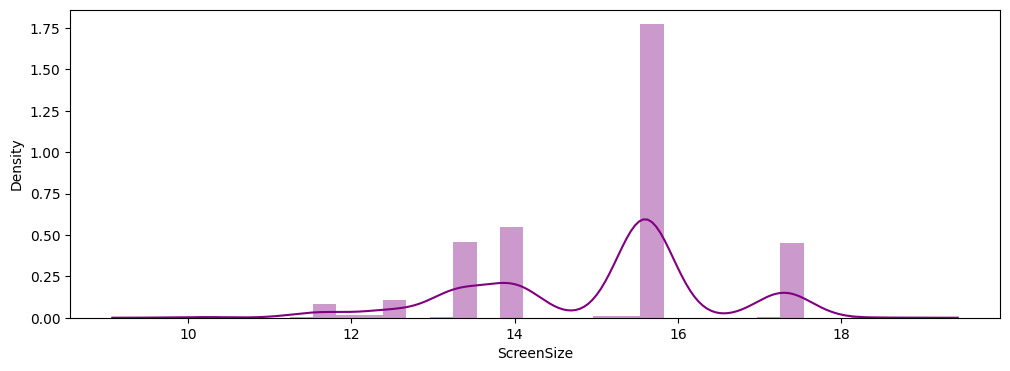

In [27]:
plt.figure(figsize=(12,4))
sns.distplot(df['ScreenSize'],color="purple")

**Max laptops are of size 15.6**

In [28]:
df['Screen'].value_counts()

Screen
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1

# Created a Touch Screen column

In [29]:
df['Touchscreen'] = df['Screen'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [30]:
df.head()

,Manufacturer,ModelName,Category,ScreenSize,Screen,Resolution,xres,yres,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,119125.2348,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,1440x900,1440,900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,79933.7448,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,1920x1080,1920,1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2880x1800,2880,1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,225630.0540,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,160376.1120,0


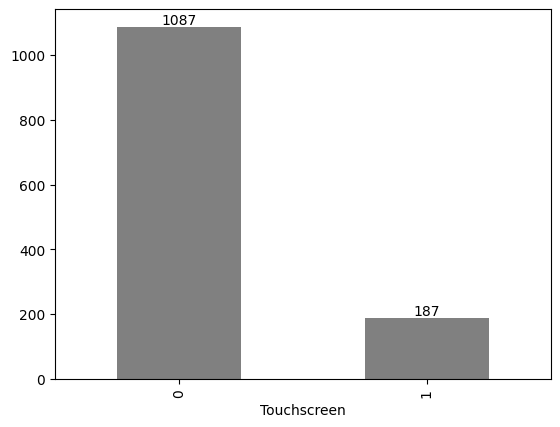

In [31]:
ax=df['Touchscreen'].value_counts().plot(kind='bar',color="grey")
for bars in ax.containers:ax.bar_label(bars)

**Very less laptops are having Touch Screens**

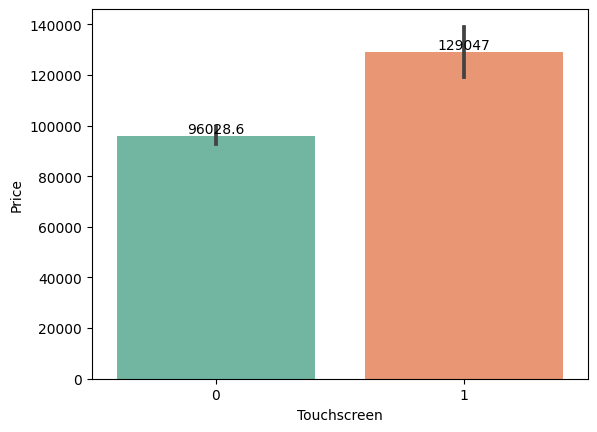

In [32]:
ax=sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='Set2')
for bars in ax.containers:ax.bar_label(bars)

**Price of Touch Screen Laptops are more**

# Created a IPS column

In [33]:
df['Ips'] = df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

In [34]:
df.head()

,Manufacturer,ModelName,Category,ScreenSize,Screen,Resolution,xres,yres,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,119125.2348,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,1440x900,1440,900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,79933.7448,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,1920x1080,1920,1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2880x1800,2880,1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,225630.0540,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,160376.1120,0,1


# Count of laptops with IPS

<Axes: xlabel='Ips'>

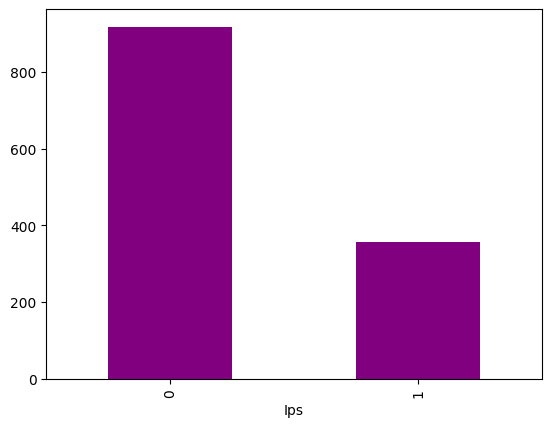

In [35]:
df['Ips'].value_counts().plot(kind='bar',color="purple")

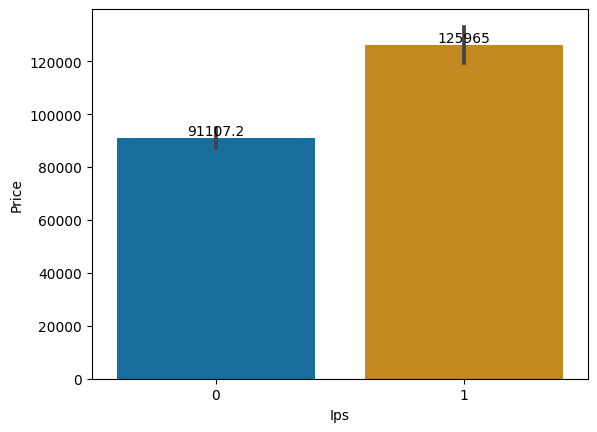

In [36]:
ax=sns.barplot(x=df['Ips'],y=df['Price'],palette='colorblind')
for bars in ax.containers:ax.bar_label(bars)

**Price of Laptops with IPS are More**

# GPU - Types

In [37]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

**Created a GPU Brand column**

In [38]:
df['Gpubrand'] = df['GPU'].apply(lambda x:x.split()[0])

In [39]:
df['Gpubrand'].value_counts()

Gpubrand
Intel     704
Nvidia    395
AMD       174
ARM         1
Name: count, dtype: int64

In [40]:
df = df[df['Gpubrand'] != 'ARM']

In [41]:
df['Gpubrand'].value_counts()

Gpubrand
Intel     704
Nvidia    395
AMD       174
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'Nvidia'), Text(2, 0, 'AMD')])

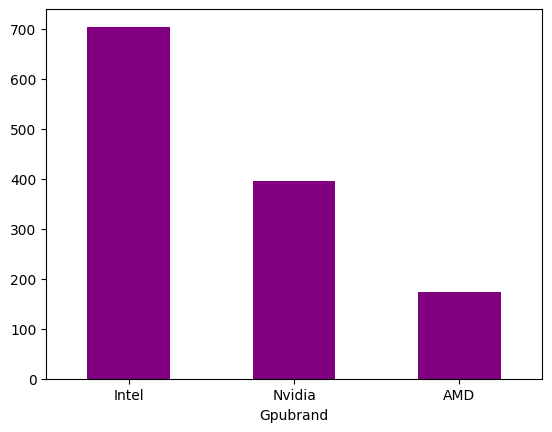

In [42]:
df['Gpubrand'].value_counts().plot(kind='bar',color="purple")
plt.xticks(rotation=0)

# Average Price in accordance to GPU brand

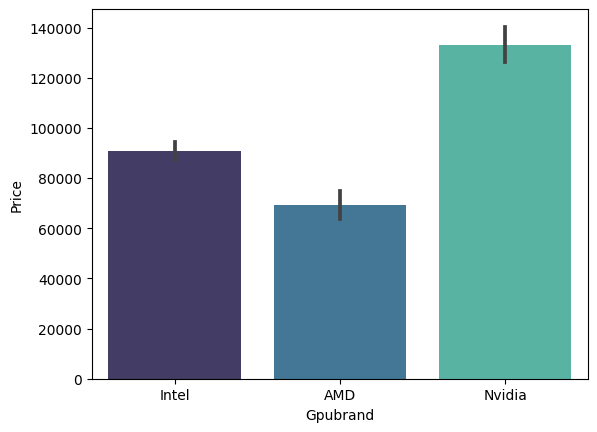

In [43]:
sns.barplot(x=df['Gpubrand'],y=df['Price'],palette='mako')
plt.show()

# CPU

In [44]:
df['CpuName'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

**Created a seperate column for CPU name**

In [45]:
df['CpuName'].value_counts()

CpuName
Intel Core i7               514
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           70
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series 9600P          2
AMD E-Series E2-9000e         2
Intel Xeon E3-1505M           2
AMD A10-Series A10-9620P      2
Intel Atom Z8350              1
AMD E-Series 9000             1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
Intel Atom x5-Z8300           1


In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [47]:
df['Cpubrand'] = df['CpuName'].apply(fetch_processor)

# CPU Brands

In [48]:
df['Cpubrand'].value_counts()

Cpubrand
Intel Core i7            514
Intel Core i5            423
Other Intel Processor    142
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i7'),
  Text(1, 0, 'Intel Core i5'),
  Text(2, 0, 'Other Intel Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'AMD Processor')])

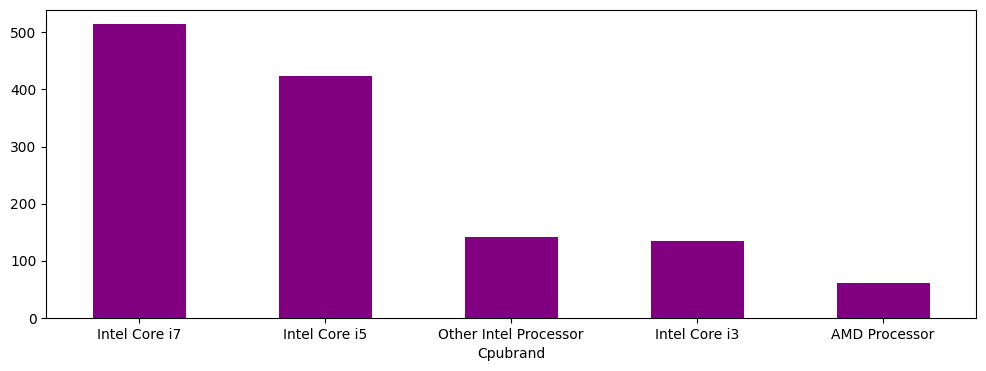

In [49]:
plt.figure(figsize=(12,4))
df['Cpubrand'].value_counts().plot(kind='bar',color="purple")
plt.xticks(rotation=0)

# Price according to Brands of CPU Processor

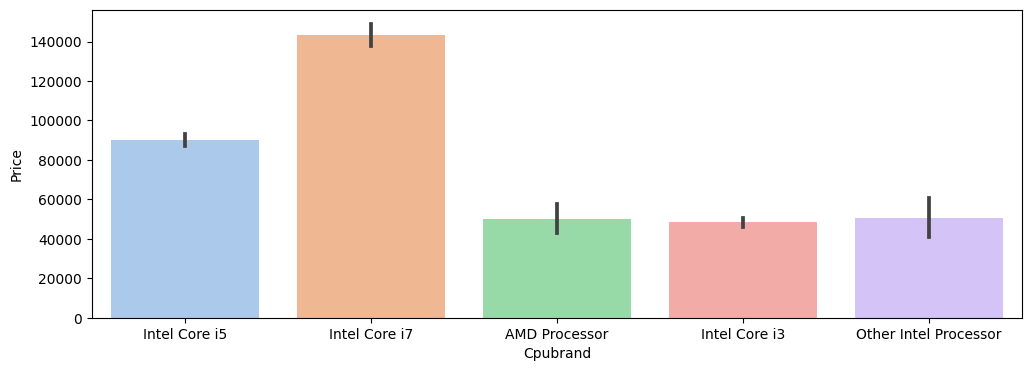

In [50]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['Cpubrand'],y=df['Price'],palette='pastel')
plt.show()

# RAM

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '8'),
  Text(1, 0, '4'),
  Text(2, 0, '16'),
  Text(3, 0, '6'),
  Text(4, 0, '12'),
  Text(5, 0, '32'),
  Text(6, 0, '2'),
  Text(7, 0, '24'),
  Text(8, 0, '64')])

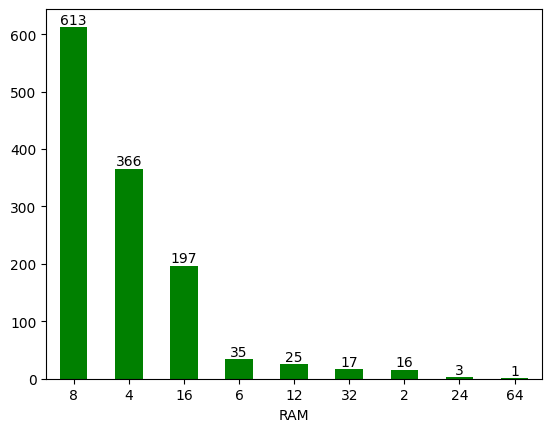

In [51]:
ax=df['RAM'].value_counts().plot(kind='bar',color="green")
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=0)

**Most laptops are of 8GB RAM**

# RAM V/S Price

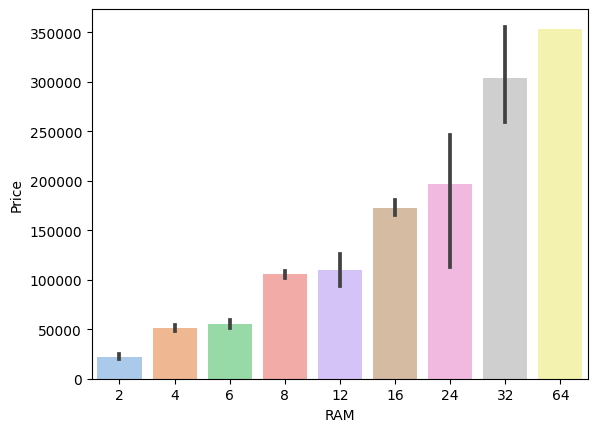

In [52]:
sns.barplot(x=df['RAM'],y=df['Price'],palette='pastel')
plt.show()

# Storage

In [53]:
df['Storage'].value_counts()

Storage
256GB SSD                           412
1000GB HDD                          216
500GB HDD                           124
512GB SSD                           114
128GB SSD +  1000GB HDD              94
128GB SSD                            74
256GB SSD +  1000GB HDD              73
32GB Flash Storage                   35
2000GB HDD                           16
512GB SSD +  1000GB HDD              14
1000GB SSD                           14
64GB Flash Storage                   13
256GB SSD +  2000GB HDD              10
256GB Flash Storage                   8
16GB Flash Storage                    7
1000GB Hybrid                         7
32GB SSD                              6
1GB SSD                               5
128GB Flash Storage                   4
16GB SSD                              3
512GB Flash Storage                   2
1000GB SSD +  1000GB HDD              2
512GB SSD +  2000GB HDD               2
256GB SSD +  500GB HDD                2
128GB SSD +  2000GB HDD         

In [54]:
df['SSD'] = df['Storage'].apply(lambda x:1 if 'SSD' in x else 0)
df['HDD'] = df['Storage'].apply(lambda x:1 if 'HDD' in x else 0)
df['Hybrid'] = df['Storage'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Flash Storage'] = df['Storage'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [55]:
df.head(2)

,Manufacturer,ModelName,Category,ScreenSize,Screen,Resolution,xres,yres,CPU,RAM,...,Price,Touchscreen,Ips,Gpubrand,CpuName,Cpubrand,SSD,HDD,Hybrid,Flash Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560x1600,2560,1600,Intel Core i5 2.3GHz,8,...,119125.2348,0,1,Intel,Intel Core i5,Intel Core i5,1,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,1440x900,1440,900,Intel Core i5 1.8GHz,8,...,79933.7448,0,0,Intel,Intel Core i5,Intel Core i5,0,0,0,1


# Operating System

In [56]:
df['Operating System'].value_counts()

Operating System
Windows    1100
No OS        66
Linux        58
Others       28
Mac OS       21
Name: count, dtype: int64

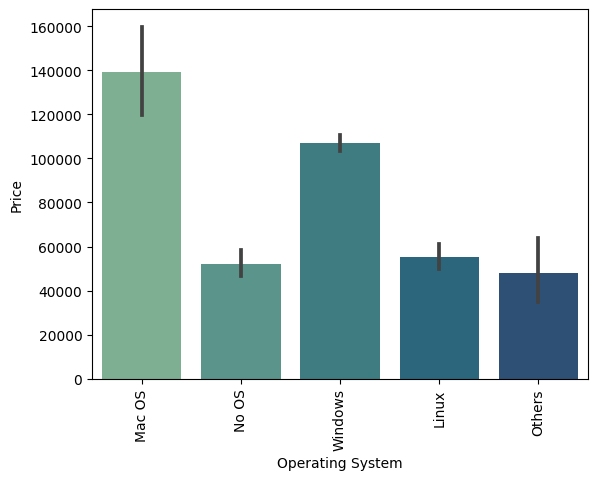

In [57]:
sns.barplot(x=df['Operating System'],y=df['Price'],palette='crest')
plt.xticks(rotation='vertical')
plt.show()

# Weight

C:\Users\nirmi\AppData\Local\Temp\ipykernel_3644\3575437122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'],color="green")


<Axes: xlabel='Weight', ylabel='Density'>

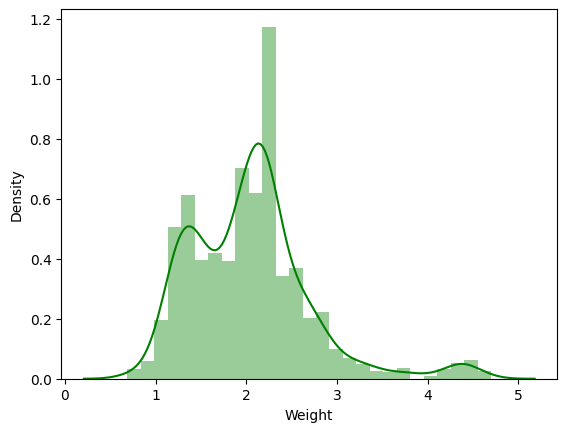

In [58]:
sns.distplot(df['Weight'],color="green")

# DELETING columns 

In [59]:
df.drop(columns=['Screen','ModelName','Resolution','GPU','CPU','CpuName'],inplace=True)

In [60]:
df.head()

,Manufacturer,Category,ScreenSize,xres,yres,RAM,Storage,Operating System,Weight,Price,Touchscreen,Ips,Gpubrand,Cpubrand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,2560,1600,8,128GB SSD,Mac OS,1.37,119125.2348,0,1,Intel,Intel Core i5,1,0,0,0
1,Apple,Ultrabook,13.3,1440,900,8,128GB Flash Storage,Mac OS,1.34,79933.7448,0,0,Intel,Intel Core i5,0,0,0,1
2,HP,Notebook,15.6,1920,1080,8,256GB SSD,No OS,1.86,51129.0000,0,0,Intel,Intel Core i5,1,0,0,0
3,Apple,Ultrabook,15.4,2880,1800,16,512GB SSD,Mac OS,1.83,225630.0540,0,1,AMD,Intel Core i7,1,0,0,0
4,Apple,Ultrabook,13.3,2560,1600,8,256GB SSD,Mac OS,1.37,160376.1120,0,1,Intel,Intel Core i5,1,0,0,0


In [61]:
df1 = df[['ScreenSize','xres','yres','RAM','Weight','Touchscreen','Ips','SSD','HDD','Hybrid','Flash Storage','Price']]

In [62]:
df1

,ScreenSize,xres,yres,RAM,Weight,Touchscreen,Ips,SSD,HDD,Hybrid,Flash Storage,Price
0,13.3,2560,1600,8,1.37,0,1,1,0,0,0,119125.2348
1,13.3,1440,900,8,1.34,0,0,0,0,0,1,79933.7448
2,15.6,1920,1080,8,1.86,0,0,1,0,0,0,51129.0000
3,15.4,2880,1800,16,1.83,0,1,1,0,0,0,225630.0540
4,13.3,2560,1600,8,1.37,0,1,1,0,0,0,160376.1120
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,14.0,1920,1080,4,1.80,1,1,1,0,0,0,56730.9600
1270,13.3,3200,1800,16,1.30,1,1,1,0,0,0,133291.0800
1271,14.0,1366,768,2,1.50,0,0,0,0,0,1,20362.6800
1272,15.6,1366,768,6,2.19,0,0,0,1,0,0,67934.8800


In [63]:
m=df1.corr()
m

,ScreenSize,xres,yres,RAM,Weight,Touchscreen,Ips,SSD,HDD,Hybrid,Flash Storage,Price
ScreenSize,1.000000,-0.090693,-0.092293,0.239942,0.826378,-0.361301,-0.107806,-0.082213,0.536368,0.047074,-0.357468,0.065425
xres,-0.090693,1.000000,-0.001138,0.047336,-0.109877,0.046406,0.097861,0.207737,-0.154683,0.017715,-0.063004,0.076925
yres,-0.092293,-0.001138,1.000000,0.415494,-0.049723,0.343767,0.281881,0.377600,-0.225332,-0.007522,-0.101053,0.550889
RAM,0.239942,0.047336,0.415494,1.000000,0.388754,0.111100,0.204076,0.390256,-0.006535,0.044748,-0.183118,0.739973
Weight,0.826378,-0.109877,-0.049723,0.388754,1.000000,-0.293760,0.024040,-0.034436,0.518077,0.098961,-0.251446,0.211158
Touchscreen,-0.361301,0.046406,0.343767,0.111100,-0.293760,1.000000,0.138663,0.139820,-0.249501,-0.036808,0.017290,0.189342
Ips,-0.107806,0.097861,0.281881,0.204076,0.024040,0.138663,1.000000,0.221940,-0.128112,-0.015792,0.003257,0.252483
SSD,-0.082213,0.207737,0.377600,0.390256,-0.034436,0.139820,0.221940,1.000000,-0.560414,-0.085591,-0.333640,0.506519
HDD,0.536368,-0.154683,-0.225332,-0.006535,0.518077,-0.249501,-0.128112,-0.560414,1.000000,-0.078733,-0.206495,-0.169692
Hybrid,0.047074,0.017715,-0.007522,0.044748,0.098961,-0.036808,-0.015792,-0.085591,-0.078733,1.000000,-0.021464,0.020945


<Axes: >

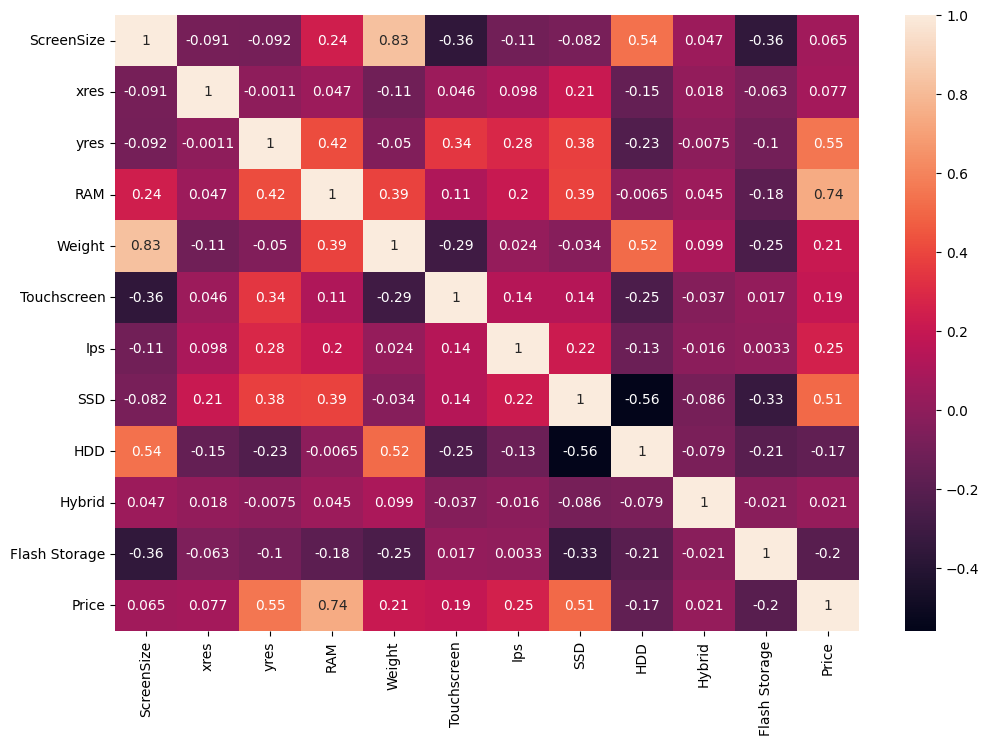

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(m,annot=True)

**Weight and ScreenSize ||  Ram and Price are having large correlation**

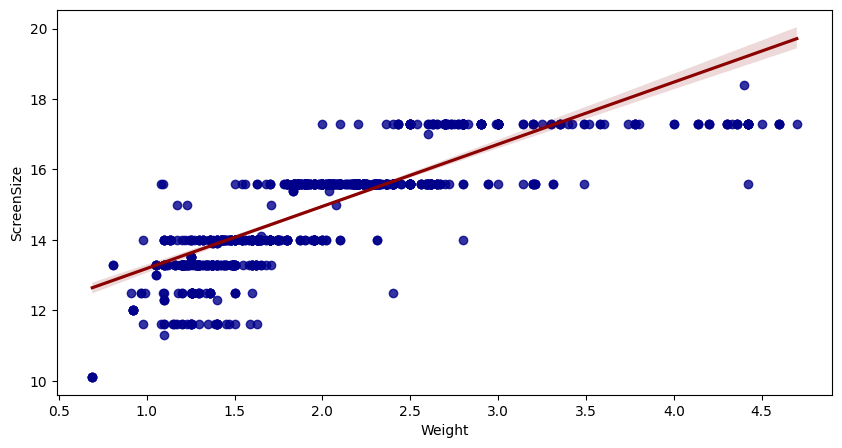

In [65]:
plt.figure(figsize=(10,5))
ax=sns.regplot(x='Weight',y='ScreenSize',data=df1,scatter_kws={"color": "darkblue"}, line_kws={"color": "darkred"})

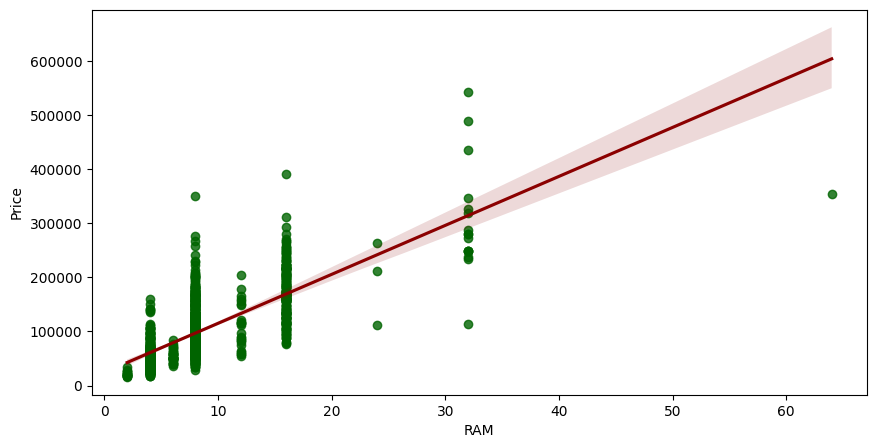

In [66]:
plt.figure(figsize=(10,5))
ax=sns.regplot(x='RAM',y='Price',data=df1,scatter_kws={"color": "darkgreen"}, line_kws={"color": "darkred"})


In [67]:
dfs=df.sample(int(0.004*len(df)))

In [68]:
len(df)

1273

C:\Users\nirmi\AppData\Local\Temp\ipykernel_3644\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

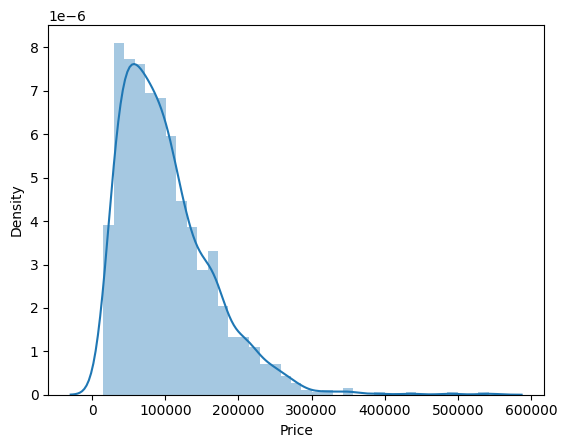

In [69]:
sns.distplot(df['Price'])

# DATA PREDICTION

# DIVIDING THE DATASET FOR TRAINING AND TESTING

**Depending on the predicted output will calculate the accuracy**

In [70]:
df.head()

,Manufacturer,Category,ScreenSize,xres,yres,RAM,Storage,Operating System,Weight,Price,Touchscreen,Ips,Gpubrand,Cpubrand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,2560,1600,8,128GB SSD,Mac OS,1.37,119125.2348,0,1,Intel,Intel Core i5,1,0,0,0
1,Apple,Ultrabook,13.3,1440,900,8,128GB Flash Storage,Mac OS,1.34,79933.7448,0,0,Intel,Intel Core i5,0,0,0,1
2,HP,Notebook,15.6,1920,1080,8,256GB SSD,No OS,1.86,51129.0000,0,0,Intel,Intel Core i5,1,0,0,0
3,Apple,Ultrabook,15.4,2880,1800,16,512GB SSD,Mac OS,1.83,225630.0540,0,1,AMD,Intel Core i7,1,0,0,0
4,Apple,Ultrabook,13.3,2560,1600,8,256GB SSD,Mac OS,1.37,160376.1120,0,1,Intel,Intel Core i5,1,0,0,0


In [71]:
#separating features and target

x = df.drop(columns=['Price'])
y = df['Price']

In [72]:
x

,Manufacturer,Category,ScreenSize,xres,yres,RAM,Storage,Operating System,Weight,Touchscreen,Ips,Gpubrand,Cpubrand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,2560,1600,8,128GB SSD,Mac OS,1.37,0,1,Intel,Intel Core i5,1,0,0,0
1,Apple,Ultrabook,13.3,1440,900,8,128GB Flash Storage,Mac OS,1.34,0,0,Intel,Intel Core i5,0,0,0,1
2,HP,Notebook,15.6,1920,1080,8,256GB SSD,No OS,1.86,0,0,Intel,Intel Core i5,1,0,0,0
3,Apple,Ultrabook,15.4,2880,1800,16,512GB SSD,Mac OS,1.83,0,1,AMD,Intel Core i7,1,0,0,0
4,Apple,Ultrabook,13.3,2560,1600,8,256GB SSD,Mac OS,1.37,0,1,Intel,Intel Core i5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Lenovo,2 in 1 Convertible,14.0,1920,1080,4,128GB SSD,Windows,1.80,1,1,Intel,Intel Core i7,1,0,0,0
1270,Lenovo,2 in 1 Convertible,13.3,3200,1800,16,512GB SSD,Windows,1.30,1,1,Intel,Intel Core i7,1,0,0,0
1271,Lenovo,Notebook,14.0,1366,768,2,64GB Flash Storage,Windows,1.50,0,0,Intel,Other Intel Processor,0,0,0,1
1272,HP,Notebook,15.6,1366,768,6,1000GB HDD,Windows,2.19,0,0,AMD,Intel Core i7,0,1,0,0


In [73]:
y

0       119125.2348
1        79933.7448
2        51129.0000
3       225630.0540
4       160376.1120
           ...     
1269     56730.9600
1270    133291.0800
1271     20362.6800
1272     67934.8800
1273     32811.4800
Name: Price, Length: 1273, dtype: float64

In [74]:
# Split the data to train and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [75]:
x_train

,Manufacturer,Category,ScreenSize,xres,yres,RAM,Storage,Operating System,Weight,Touchscreen,Ips,Gpubrand,Cpubrand,SSD,HDD,Hybrid,Flash Storage
1206,Lenovo,Notebook,15.600000,1366,768,4,500GB HDD,Windows,2.20,0,0,AMD,AMD Processor,0,1,0,0
279,Lenovo,Notebook,17.299999,1920,1080,8,2000GB HDD,No OS,2.80,0,0,Nvidia,Intel Core i7,0,1,0,0
1205,HP,Notebook,15.600000,1366,768,8,256GB SSD,Windows,1.91,0,0,Intel,Intel Core i5,1,0,0,0
1123,Asus,Notebook,15.600000,1366,768,4,1000GB HDD,Windows,2.00,0,0,Intel,Intel Core i3,0,1,0,0
391,Asus,Gaming,17.299999,1920,1080,16,256GB SSD + 1000GB HDD,Windows,3.00,0,0,Nvidia,Intel Core i7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.600000,1366,768,4,500GB HDD,Windows,2.20,0,0,Nvidia,Intel Core i3,0,1,0,0
299,Asus,Ultrabook,15.600000,1920,1080,16,512GB SSD,Windows,1.63,0,0,Nvidia,Intel Core i7,1,0,0,0
493,Acer,Notebook,15.600000,1366,768,8,1000GB HDD,Windows,2.20,0,0,AMD,AMD Processor,0,1,0,0
527,Lenovo,Notebook,15.600000,1366,768,8,2000GB HDD,No OS,2.20,0,0,Nvidia,Intel Core i3,0,1,0,0


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,6,7,11,12])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.648006916901784
MAE 21977.909640481146


C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,6,7,11,12])],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score 0.6605696589969876
MAE 21625.671086117647


In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,6,7,11,12])],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6500747958955074
MAE 22058.160647058823


C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,6,7,11,12])],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7926014219301387
MAE 17441.82115751742


C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [85]:
from sklearn.svm import SVR

In [86]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,6,7,11,12])],remainder='passthrough')

step2 = SVR()

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nirmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score -0.0712041497465501
MAE 42550.74103245459


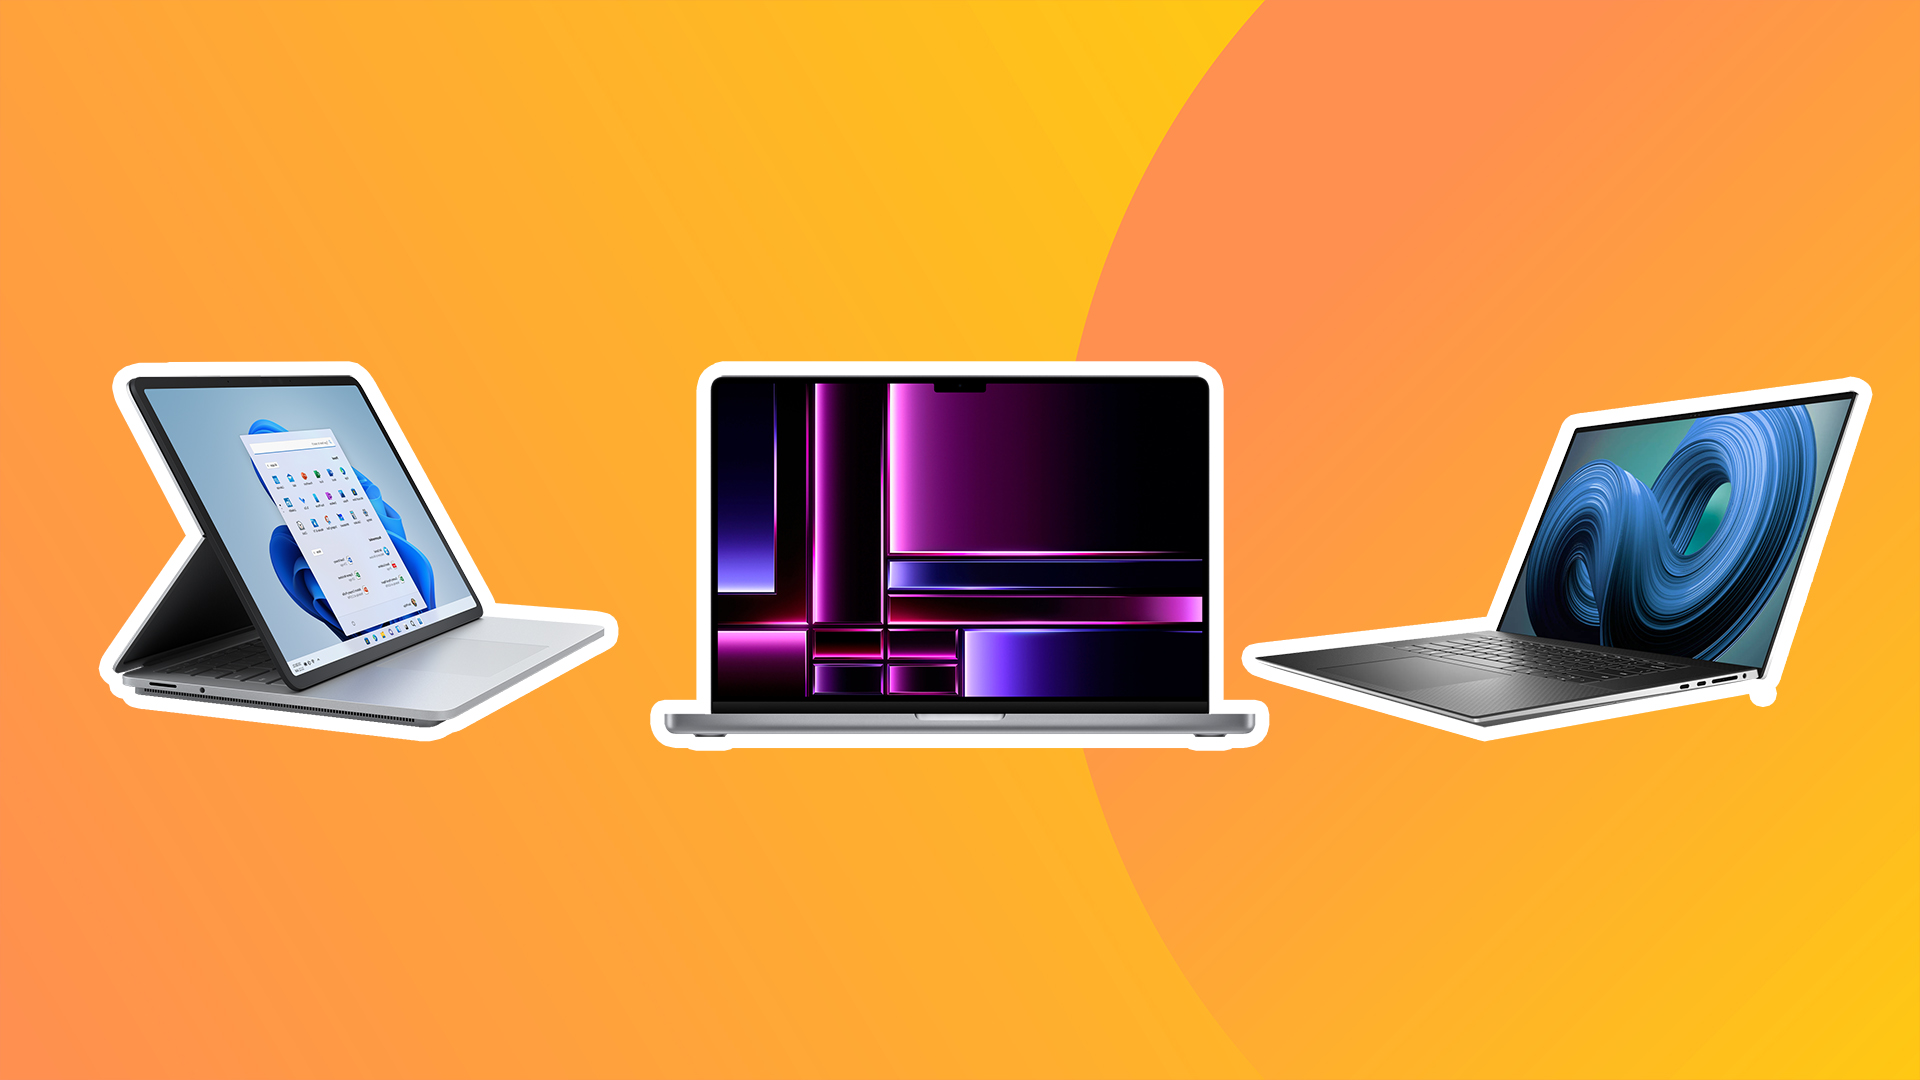